# Отчёт по производительности для задания №5 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/5_log.txt").read_text(encoding="utf-8")
pd.set_option('display.max_rows', 150)

header_re = re.compile(r"Size: (\d+)x(\d+), elements = (\d+), Matrix type: (\w+), Schedule: (\w+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_n = None
current_elements = None
current_type = None
current_schedule = None

lines = text.splitlines()

i = 0
while i < len(lines):
    line = lines[i].strip()

    if line == "--------------------------------------":
        i += 1
        continue

    m_header = header_re.search(line)
    if m_header:
        n = int(m_header.group(1))
        elements = int(m_header.group(3))
        matrix_type = m_header.group(4)
        schedule = m_header.group(5)
        current_n = n
        current_elements = elements
        current_type = matrix_type
        current_schedule = schedule
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads and current_n is not None:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            time_line = lines[i].strip()
            m_time = time_re.search(time_line)
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'n': current_n,
                    'elements': current_elements,
                    'matrix_type': current_type,
                    'schedule': current_schedule,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
                i += 1
                continue
        i += 1
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df

Rows: 108


,n,elements,matrix_type,schedule,threads,time_ms,speedup,efficiency
0,1000,1000000,banded,static,1,5.840580,1.00000,1.000000
1,1000,1000000,banded,static,2,2.804280,2.08274,1.041370
2,1000,1000000,banded,static,4,1.435710,4.06808,1.017020
3,1000,1000000,banded,static,6,1.077000,5.42301,0.903836
4,1000,1000000,banded,static,8,0.828945,7.04581,0.880726
5,1000,1000000,banded,static,12,0.715472,8.16326,0.680271
6,1000,1000000,banded,dynamic,1,5.840580,1.00000,1.000000
7,1000,1000000,banded,dynamic,2,2.801060,2.08514,1.042570
8,1000,1000000,banded,dynamic,4,1.422220,4.10666,1.026660
9,1000,1000000,banded,dynamic,6,1.021390,5.71827,0.953046


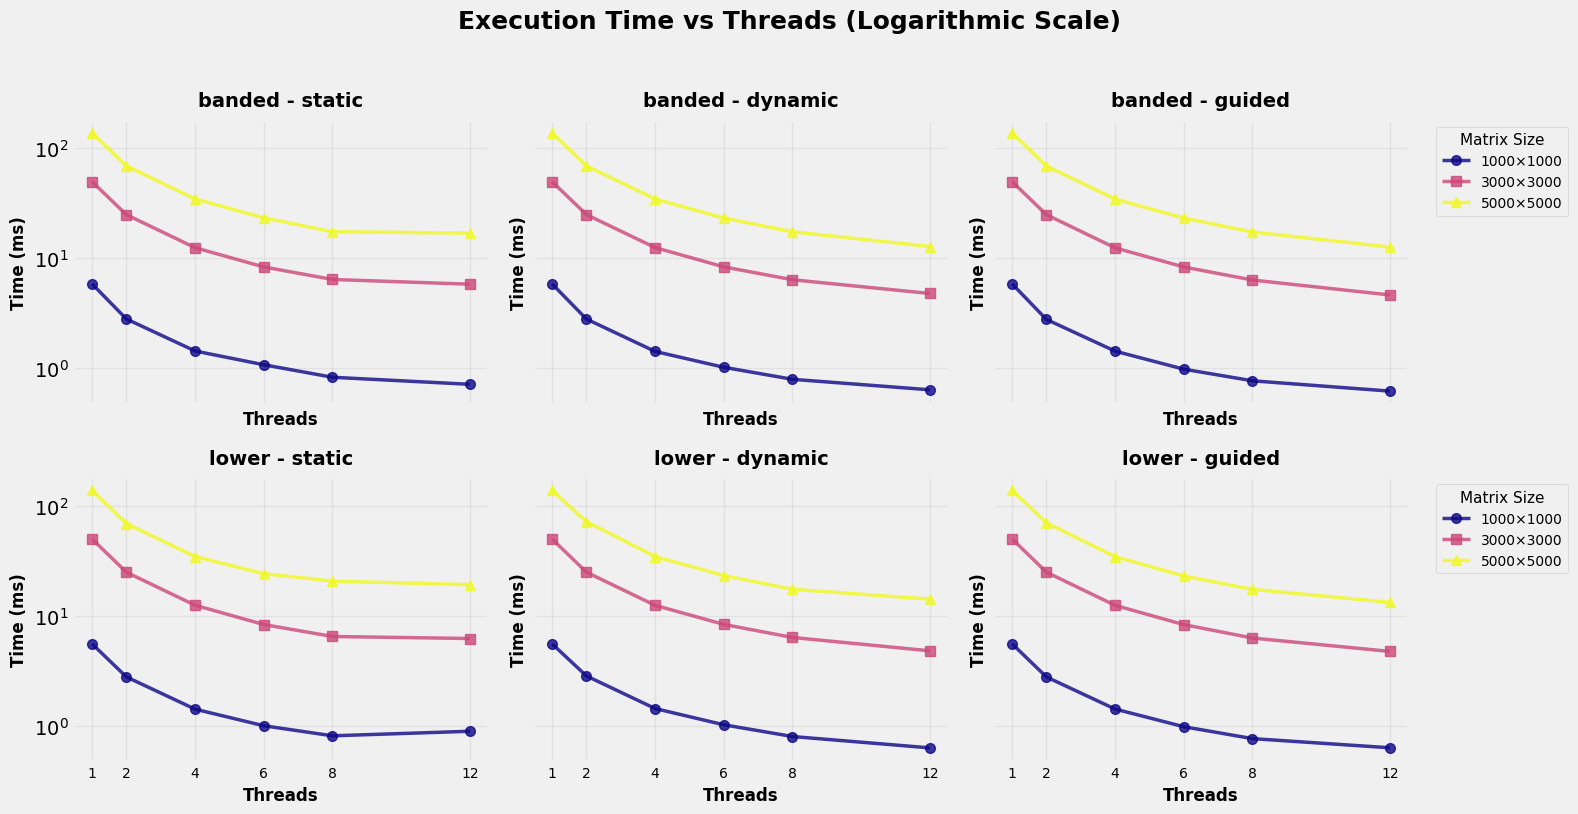

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

unique_types = df['matrix_type'].unique()
unique_schedules = df['schedule'].unique()
unique_n = sorted(df['n'].unique())
labels = [f"{n}×{n}" for n in unique_n]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_n)))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

fig, axs = plt.subplots(len(unique_types), len(unique_schedules), 
                       figsize=(16, 4*len(unique_types)), 
                       sharex=True, sharey=True)
if len(unique_types) == 1 or len(unique_schedules) == 1:
    axs = np.array(axs).reshape(len(unique_types), len(unique_schedules))

for row_idx, matrix_type in enumerate(unique_types):
    for col_idx, schedule in enumerate(unique_schedules):
        ax = axs[row_idx, col_idx]
        for idx, current_n in enumerate(unique_n):
            sub = df[(df['n'] == current_n) & 
                    (df['matrix_type'] == matrix_type) & 
                    (df['schedule'] == schedule)].sort_values('threads')
            
            ax.plot(sub['threads'], sub['time_ms'], 
                   marker=markers[idx % len(markers)],
                   linestyle='-',
                   linewidth=2.5,
                   markersize=7,
                   color=colors[idx], 
                   label=labels[idx],
                   alpha=0.8)
        
        ax.set_title(f'{matrix_type} - {schedule}', fontsize=14, fontweight='bold', pad=10)
        ax.set_xlabel('Threads', fontsize=12, fontweight='bold')
        ax.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
        ax.set_yscale('log')
        ax.grid(True, alpha=0.4)
        
        # Устанавливаем метки на оси X
        threads = sorted(df['threads'].unique())
        ax.set_xticks(threads)
        ax.set_xticklabels(threads, fontsize=10)
        
        # Добавляем легенду только в последнем столбце
        if col_idx == len(unique_schedules) - 1:
            ax.legend(title='Matrix Size', 
                     title_fontsize=11,
                     fontsize=10,
                     bbox_to_anchor=(1.05, 1), 
                     loc='upper left',
                     frameon=True)

plt.suptitle('Execution Time vs Threads (Logarithmic Scale)', 
             fontsize=18, 
             fontweight='bold', 
             y=1.02)
plt.tight_layout()
plt.show()

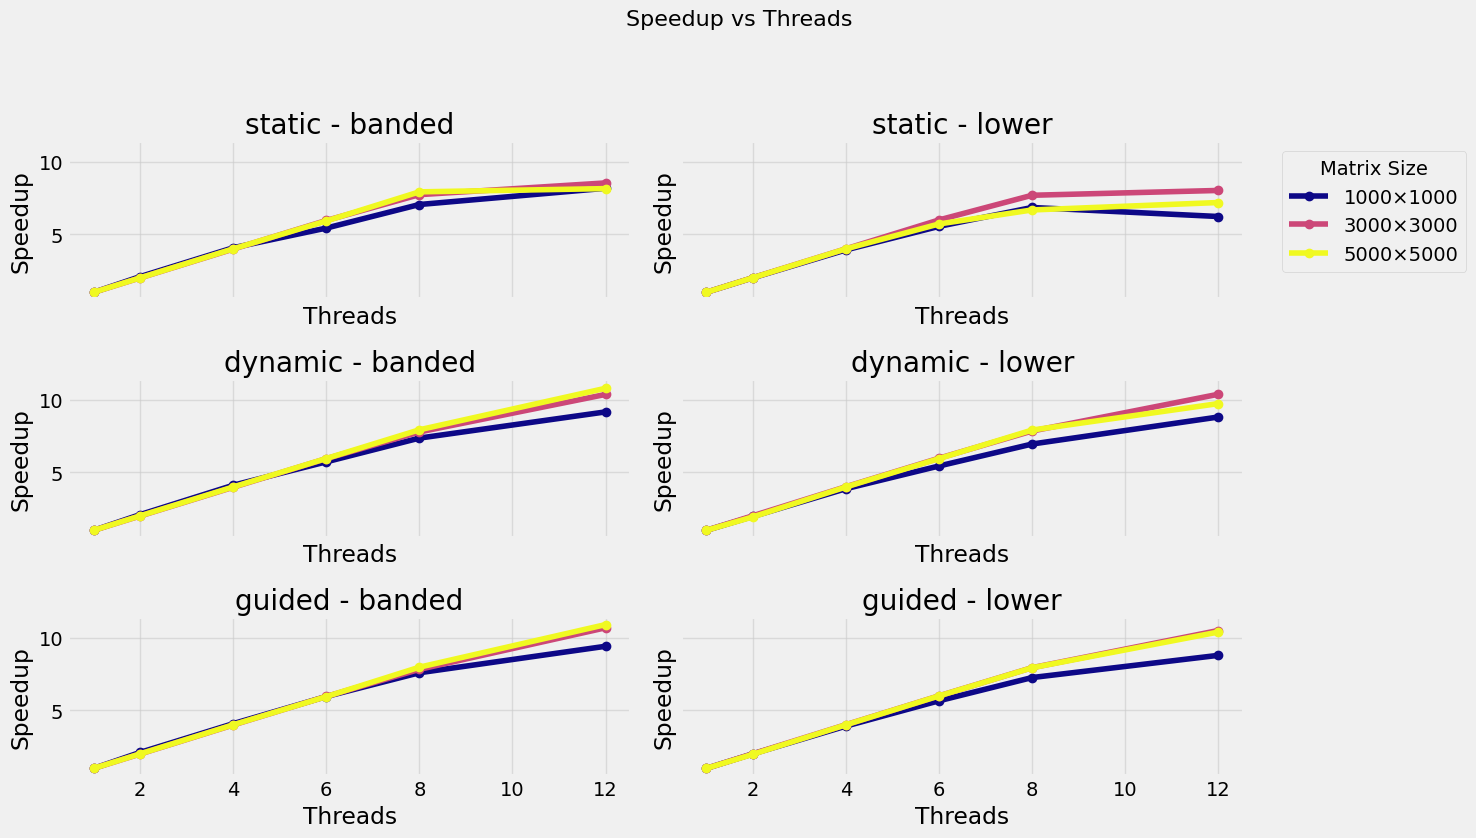

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
unique_types = df['matrix_type'].unique()
unique_schedules = df['schedule'].unique()
unique_n = sorted(df['n'].unique())
labels = [f"{n}×{n}" for n in unique_n]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_n)))

fig, axs = plt.subplots(len(unique_schedules), len(unique_types), figsize=(15, 8), sharex=True, sharey=True)
if len(unique_schedules) == 1 or len(unique_types) == 1:
    axs = np.array(axs).reshape(len(unique_schedules), len(unique_types))

for row_idx, schedule in enumerate(unique_schedules):
    for col_idx, matrix_type in enumerate(unique_types):
        ax = axs[row_idx, col_idx]
        for idx, current_n in enumerate(unique_n):
            sub = df[(df['n'] == current_n) & (df['matrix_type'] == matrix_type) & (df['schedule'] == schedule)].sort_values('threads')
            ax.plot(sub['threads'], sub['speedup'], 'o-', color=colors[idx], label=labels[idx])
        
        ax.set_title(f'{schedule} - {matrix_type}')
        ax.set_xlabel('Threads')
        ax.set_ylabel('Speedup')
        ax.grid(True, alpha=0.6)
        
        if row_idx == 0 and col_idx == len(unique_types) - 1:
            ax.legend(title='Matrix Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Speedup vs Threads', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

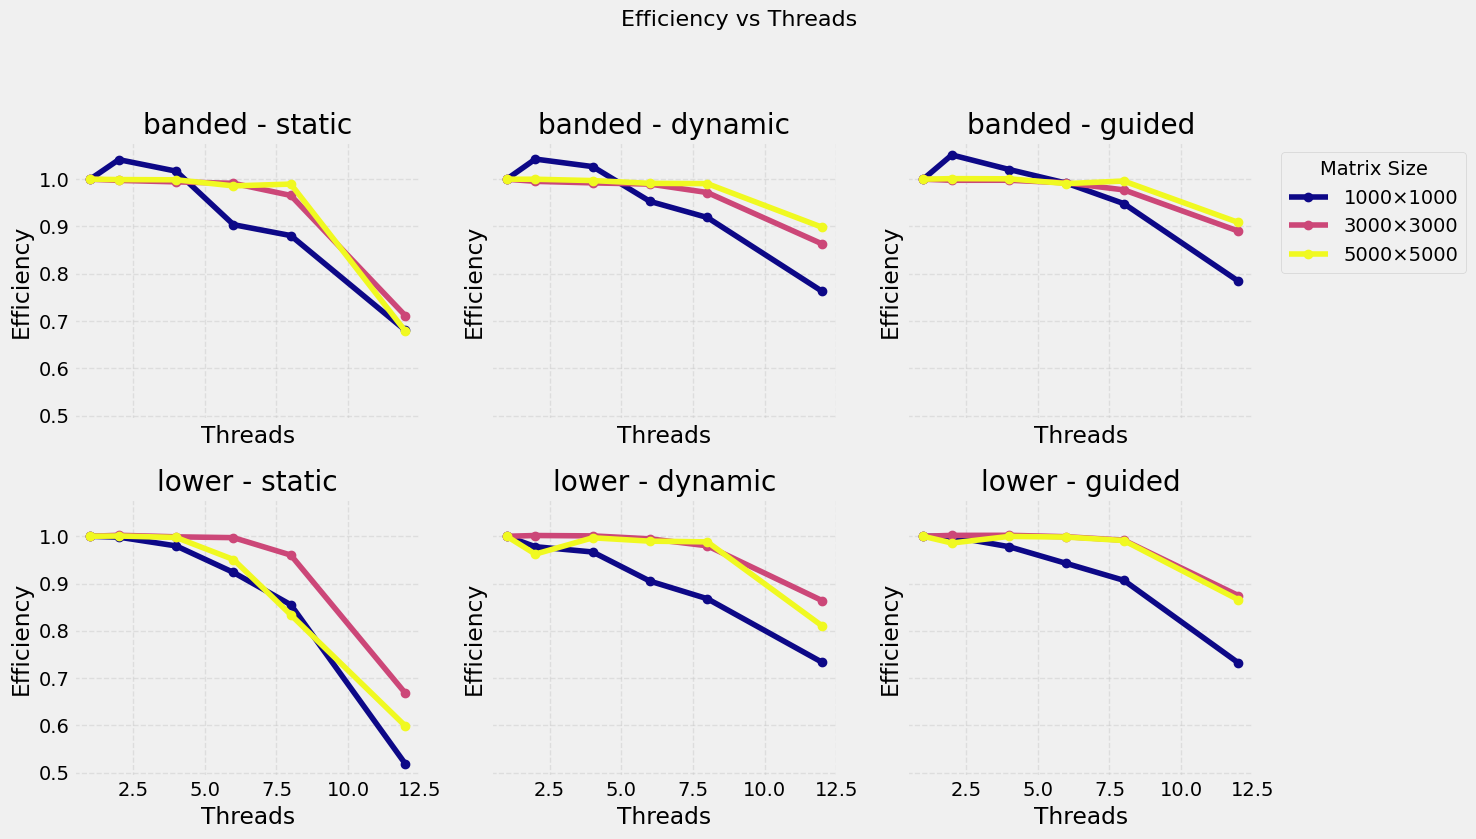

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
unique_types = df['matrix_type'].unique()
unique_schedules = df['schedule'].unique()
unique_n = sorted(df['n'].unique())
labels = [f"{n}×{n}" for n in unique_n]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_n)))

fig, axs = plt.subplots(len(unique_types), len(unique_schedules), figsize=(15, 8), sharex=True, sharey=True)
if len(unique_types) == 1 or len(unique_schedules) == 1:
    axs = np.array(axs).reshape(len(unique_types), len(unique_schedules))

for row_idx, matrix_type in enumerate(unique_types):
    for col_idx, schedule in enumerate(unique_schedules):
        ax = axs[row_idx, col_idx]
        for idx, current_n in enumerate(unique_n):
            sub = df[(df['n'] == current_n) & (df['matrix_type'] == matrix_type) & (df['schedule'] == schedule)].sort_values('threads')
            ax.plot(sub['threads'], sub['efficiency'], 'o-', color=colors[idx], label=labels[idx])
        ax.set_title(f'{matrix_type} - {schedule}')
        ax.set_xlabel('Threads')
        ax.set_ylabel('Efficiency')
        ax.grid(True, alpha=0.5, linestyle='--')
        if row_idx == 0 and col_idx == len(unique_schedules) - 1:
            ax.legend(title='Matrix Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Efficiency vs Threads', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

- **Lower triangular matrix (нижнетреугольная матрица)**:  
  Матрица, в которой ненулевые элементы расположены только ниже и на главной диагонали. Для строки `i` ненулевыми являются элементы в столбцах `j` от `0` до `i` включительно. Все элементы выше главной диагонали (где `j > i`) равны нулю.

- **Banded matrix (ленточная матрица)**:  
  Матрица, где ненулевые элементы сосредоточены в "ленте" фиксированной ширины вокруг главной диагонали. Для заданной ширины `k` ненулевыми являются только элементы, удовлетворяющие условию `|i - j| ≤ k`. Все остальные элементы матрицы равны нулю.

- **Static schedule (статическое планирование OpenMP)**:  
  Итерации цикла заранее статически распределяются между потоками, обычно равными блоками. Каждый поток получает фиксированный набор итераций до начала выполнения.

- **Dynamic schedule (динамическое планирование OpenMP)**:  
  Итерации распределяются динамически во время выполнения. Каждый поток получает очередную порцию итераций (chunk) только после завершения предыдущей порции. Размер порции по умолчанию равен 1.

- **Guided schedule (направляемое планирование OpenMP)**:  
  Разновидность динамического планирования, при котором размер порций итераций уменьшается экспоненциально. В начале цикла порции крупные, а по мере выполнения уменьшаются до минимального размера для лучшей балансировки нагрузки.
  